# analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

https://replit.com/@VishnuTR/boilerplate-sea-level-predictor#main.py

In [1]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
# Read data from file and renaming to 
df = pd.read_csv("epa-sea-level.csv", float_precision="legacy").rename(
        columns={
            "Year": "year",
            "CSIRO Adjusted Sea Level": "sea",
        }
    )
df.head()

,year,sea,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


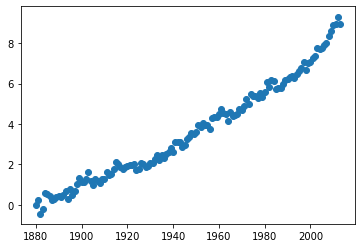

In [4]:
#simple scatter plot
plt.scatter(df['year'], df['sea'])
plt.show()

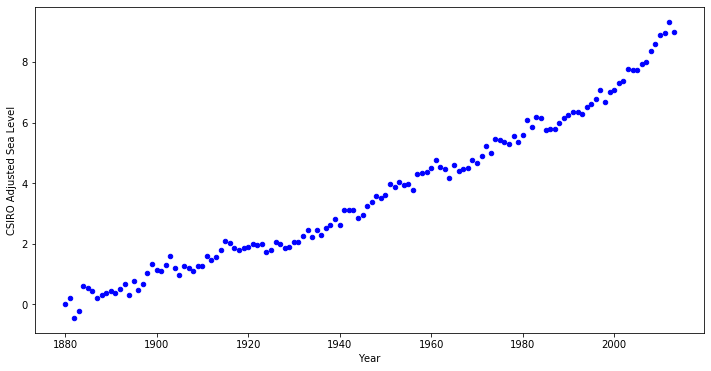

In [27]:
# c -- color
# s -- marker size
plt.figure(figsize=(12, 6))
plt.scatter(df['year'], df['sea'],c = 'blue',s = 20)
plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level")
plt.show()

-- to check the effificiency of two functions using 'timeit module'
https://realpython.com/visualizing-python-plt-scatter/

#linear regression with scipy
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [26]:
#creating a regressor with 'linregress' - as name when imported(scipy.stats)
regressor = linregress(df["year"], df["sea"])
regressor

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715)

In [33]:
#Coefficient of determination (R-squared):
print(f"R-squared: {regressor.rvalue**2:.6f}")

R-squared: 0.969747


f-string method

https://www.javatpoint.com/f-string-in-python
F-string Method
It is a new string formatting mechanism introduced by the PEP 498. It is also known as Literal String Interpolation or more commonly as F-strings (f character preceding the string literal). The primary focus of this mechanism is to make the interpolation easier.

When we prefix the string with the letter 'F, the string becomes the f-string itself. The f-string can be formatted in much same as the str.format() method. The F-string offers a convenient way to embed Python expression inside string literals for formatting.

In [38]:
#different way of printing value (1)
print("R-squared:", {regressor.rvalue**2})

R-squared: {0.969746607414955}


In [39]:
#different way of printing value (2)
print("R-squared:{}".format(regressor.rvalue**2))  

R-squared:0.969746607414955


In [43]:
# increase data size for future prediction
last_year = df["year"].max()
df = df.append([{"year": y} for y in range(last_year + 1, 2050)])

appending value to a dataframe, normal case when need to add only few values

df = df.append({'Roll': 15, 'Name': "Wilson", 'Language': "Golang"}, ignore_index=True)

https://www.geeksforgeeks.org/python-pandas-dataframe-append/

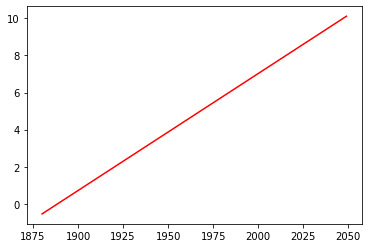

In [50]:
#plotting with the predicted value
plt.plot(
        df["year"],
        regressor.intercept + regressor.slope * df["year"],
        c="r",
        label="fit all",
        
    )

In [52]:
#creating a new recent dataset for creating a new model
#consider data from 2000 to 2050
df_recent = df.loc[(df["year"] >= 2000) & (df["year"] <= last_year)]
df_recent.head()

,year,sea,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933


In [53]:
#new model
regressor_nw = linregress(df_recent["year"], df_recent["sea"])
regressor_nw

LinregressResult(slope=0.16642727333186808, intercept=-325.79346680596467, rvalue=0.976287571614062, pvalue=2.4388064141616947e-09, stderr=0.010652933111541106)

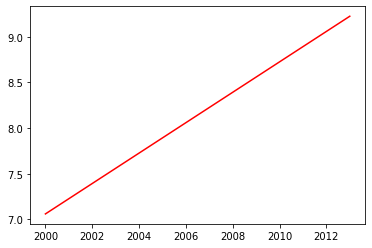

In [54]:
plt.plot(
        df_recent["year"],
        regressor_nw.intercept + regressor_nw.slope * df_recent["year"],
        c="r",
        label="fit all",
        
    )

In [60]:
df_recent = df_recent.append(
        [{"year": y} for y in range(last_year + 1, 2050)]
    )

Text(0.5, 1.0, 'Rise in Sea Level')

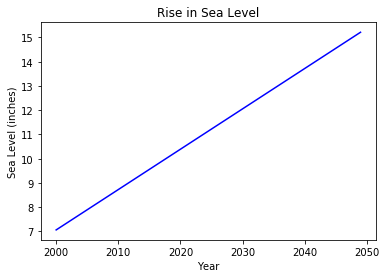

In [58]:
plt.plot(
        df_recent["year"],
        regressor_nw.intercept + regressor_nw.slope * df_recent["year"],
        c="b",
        label="fit recent",
    )
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")

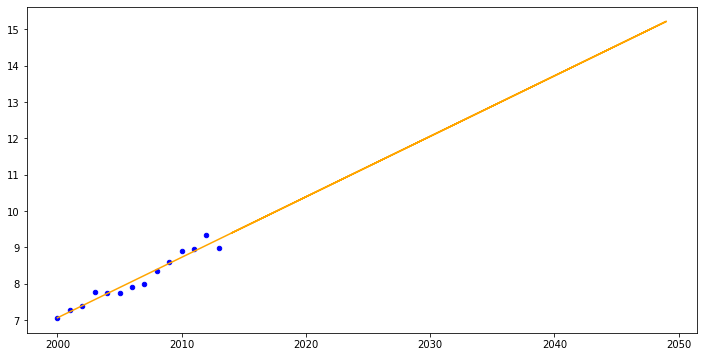

In [64]:
plt.figure(figsize=(12, 6))
plt.scatter(df_recent['year'], df_recent['sea'],c = 'blue',s = 20)
plt.plot(
        df_recent["year"],
        regressor_nw.intercept + regressor_nw.slope * df_recent["year"],
        c="orange",
        label="fit recent",
    )
plt.show()